# What is the best Data Science content?
Let's say we're working for a company that creates data science content, be it books, online articles, videos or interactive text-based platforms like Dataquest.

We're tasked with figuring out what is best content to write about. We know that given the lack of instructions there's some leeway in what "best" means here.

We decided to scower the internet in search for the answer to the question *"What is it that people want to learn about in data science?"* (as opposed to determining the most profitable content, for instance).

From our career, we know that one good place related to programming is [Stack Overflow](https://stackoverflow.com/) (a question and answer website about programming). [Stack Overflow](https://stackoverflow.com/) is part of a question and answer website network called [Stack Exchange](https://stackexchange.com/).

[Stack Exchange](https://stackexchange.com/) hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and [data science!](https://datascience.stackexchange.com/ )

### Data Science on Stack Exchange.
Stack Exchange employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.

Being a multidisciplinary field, there a few Stack Exchange websites there are relevant to our goal here:
* [Data Science](https://datascience.stackexchange.com/)
* [Cross Validated](https://stats.stackexchange.com/) — a statistics site
* [Artificial Intelligence](https://ai.stackexchange.com/)
* [Mathematics](https://math.stackexchange.com/)
* [Stack Overflow](https://stackoverflow.com/)

And if we want to include Data Engineering, we can also consider:
* [Database Administrators](https://dba.stackexchange.com/)
* [Unix & Linux](https://unix.stackexchange.com/)
* [Software Engineering](https://softwareengineering.stackexchange.com/)

If we open [this link](https://stackexchange.com/sites?view=list#percentanswered), we'll find a complete list of Stack Exchange websites sorted by percentage of questions that received answers. At the time of this writing, **Data Science Stack Exchange (DSSE)** is on the bottom 10 sites (6th from the bottom) with respect to this metric.

The fact that DSSE is a data science dedicated site (contrarily to the others), coupled with it **having a lot of an unanswered questions, makes it an ideal candidate for this investigation**. DSSE will be the focus of this guided project.

#### Public Database.
Stack Exchange provides a public database for each of its websites. Here's a [link](https://data.stackexchange.com/datascience/query/new) to query and explore Data Science Stack Exchange's database.

#### The posts table.
The **`posts`** table has a lot of columns. We'll be focusing our attention on those that seem relevant towards our goal:

* **`Id`** : An identification number for the post.
* **`PostTypeId`** : An identification number for the type of post.
* **`CreationDate`** : The date and time of creation of the post.
* **`Score`** : The post's score.
* **`ViewCount`** : How many times the post was viewed.
* **`Tags`** : What tags were used.
* **`AnswerCount`** : How many answers the question got (only applicable to question posts).
* **`FavoriteCount`** : How many times the question was favored (only applicable to question posts).

---
Note that with the exception of the tags column, the last few columns contain information about how popular the post is — the kind of information we're after.

Since we're only interested in recent posts, we'll limit our analysis to the posts of 2019. The dataset we'll be working with was created **by extracting all the columns listed above, running an SQL query.** 

In [1]:
# Setup the environment
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Read the file into a pandas dataframe & parse the dates 
# from string to a datetime object.
questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

In [2]:
# Perform a little exploration of data.
questions

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN
5,44430,2019-01-23 11:13:32,0,283,<fuzzy-logic>,1,NaN
6,44432,2019-01-23 11:17:46,1,214,<time-series><anomaly-detection><online-learning>,0,1.0
7,44436,2019-01-23 12:49:39,0,9,<matrix-factorisation>,0,NaN
8,44437,2019-01-23 13:04:11,0,7,<correlation><naive-bayes-classifier>,0,NaN
9,44438,2019-01-23 13:16:29,0,584,<machine-learning><python><deep-learning><kera...,1,NaN


In [3]:
# Display the the detailed fields (columns) information
# of data, their types and nulls.
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


#### Data issues.
Although the data are generally clean, we've identified issues. Let's fix the one issue we found:

* Set the appropriate types for the columns,
* Clean the Tags column to fit our purposes (replace the < > with quotes, for a normal string manipulation.)
* Handle missing values (NaNs).

In [4]:
# Fill-in the missing values with zero (0).
questions["FavoriteCount"] = questions["FavoriteCount"].fillna(0)

# Convert the following column to int64.
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)

# Clean the Tags column.
# Replace "<" with "," (to create a list), remove ">" and the last ","
questions["Tags"] = questions["Tags"].str.replace(">", ",")
questions["Tags"] = questions["Tags"].str.replace("<", "")
questions["Tags"] = questions["Tags"].str.rstrip(",")

In [5]:
# Run info again.
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


In [6]:
# Display the first 5 rows.
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"machine-learning,data-mining",0,0
1,44420,2019-01-23 09:34:01,0,25,"machine-learning,regression,linear-regression,...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"python,time-series,forecast,forecasting",0,0
3,44427,2019-01-23 10:57:09,0,55,"machine-learning,scikit-learn,pca",1,0
4,44428,2019-01-23 11:02:15,0,19,"dataset,bigdata,data,speech-to-text",0,0


**We now focus on determining the most popular tags.**
We'll do so by considering two different popularity proxies: 
* For each tag we'll count how many times the tag was used, 
* and how many times a question with that tag was viewed.

In [7]:
# Count how many times each tag was used and viewed.
tagsUsed = {}
tagsViewed = {}
for idx, tags in enumerate(questions["Tags"]):
    tags = list(tags.split(",")) # convert the whole tag to a list.
    
    # Loop throught each tag.
    for tag in tags:
        
        # If it's already in Used dictionary increase the counter by 1,
        if tag in tagsUsed:
            tagsUsed[tag] += 1
        # If not, add it to dictionary.
        elif tag not in tagsUsed:
            tagsUsed[tag] = 1
        
        # If it's already in Viewed dictionary 
        # increase the counter by the number of views,
        if tag in tagsViewed:
            tagsViewed[tag] += questions["ViewCount"].iloc[idx]
            
        # If not, add the number of views into the dictionary.
        elif tag not in tagsViewed:
            tagsViewed[tag] = questions["ViewCount"].iloc[idx]

In [8]:
# Convert dictionaries to dataframes.
# ---------------------------------------

# 1. tagsUsed.
# 1.1. Convert to dataframe with the name as index 
# and the counter as value.
tagsUsedDF = pd.DataFrame.from_dict(tagsUsed, orient="index")

# 1.2. Assign a column name and sort by index (the name)
tagsUsedDF.columns = ["Used"]
tagsUsedDF = tagsUsedDF.sort_index("index")

# 2. tagsViewed.
# 2.1. Convert to dataframe with the name as index
# and the counter as value.
tagsViewedDF = pd.DataFrame.from_dict(tagsViewed, orient="index")

# 2.2. Assign a column name and sort by index (the name)
tagsViewedDF.columns = ["Viewed"]
tagsViewedDF = tagsViewedDF.sort_index("index")

In [9]:
# Print the first 5 lines of the "tagsUsed" & "tagsViewed" dataframes.
print(tagsUsedDF.head(), "\n")
print(tagsViewedDF.head())

                     Used
.net                    1
3d-object-detection     1
3d-reconstruction       9
ab-test                 6
accuracy               89 

                     Viewed
.net                    438
3d-object-detection       7
3d-reconstruction      1129
ab-test                 153
accuracy              15233


## Plot the values.
* **`most_used`** is a dataframe that counts how many times each of the top 20 tags was used.
* **`most_viewed`** is a dataframe that counts how many times each of the top 20 tags was viewed.

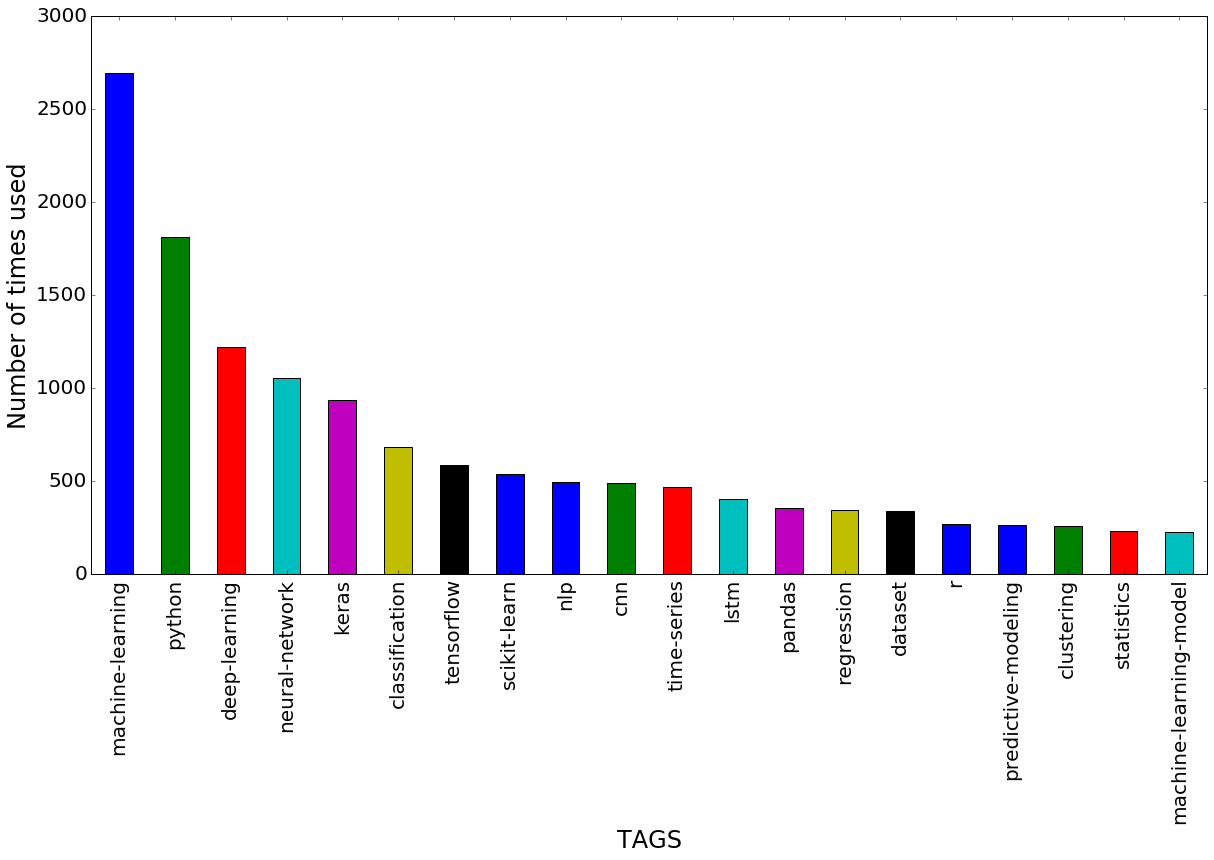

In [10]:
# Create a dataframe and plot the first 20 of it's values 
# using verical bar plot type.
# The values are sorted by Y-AXIS (the counters), Descending
most_used = tagsUsedDF["Used"].sort_values(ascending=False).head(20)
most_used.plot(kind="bar", figsize=(20, 10))

plt.xticks(fontsize=20)
plt.xlabel("TAGS", fontsize=24)
plt.yticks(fontsize=20)
plt.ylabel("Number of times used", fontsize=24)

plt.show()

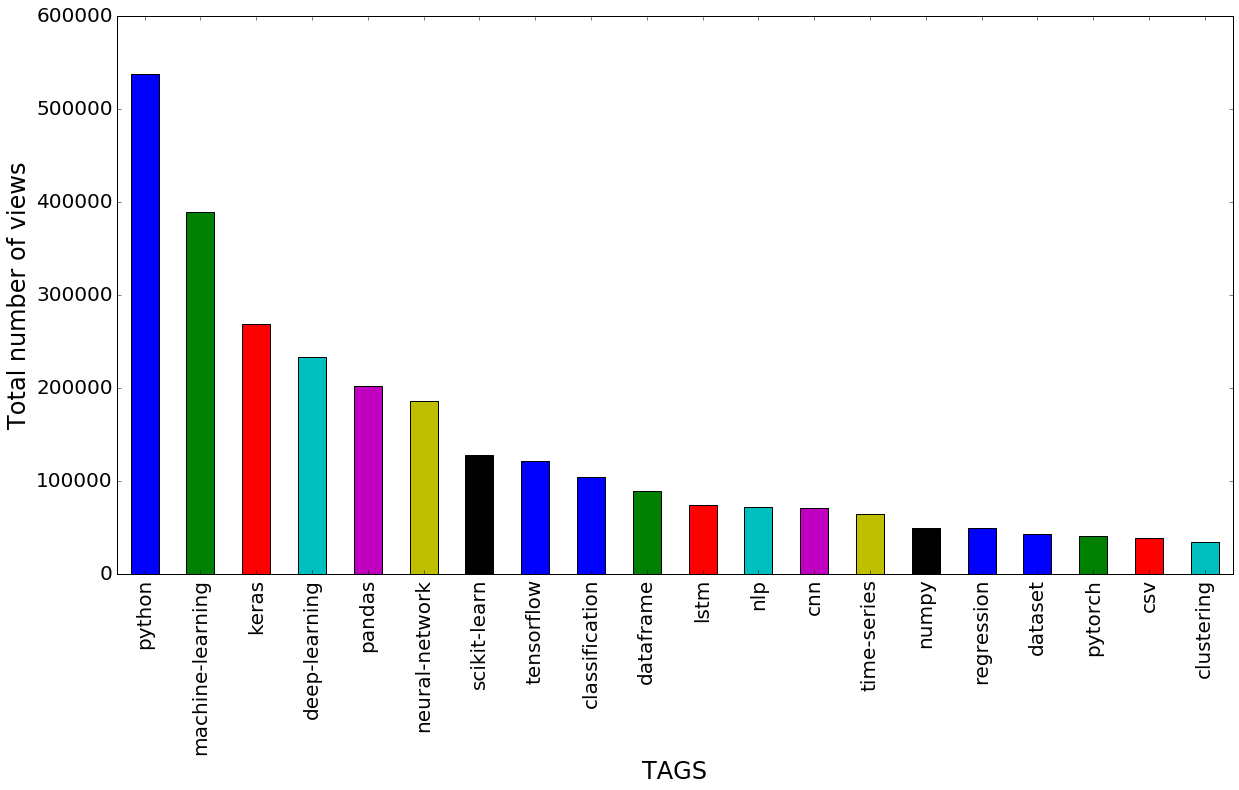

In [11]:
# Create a dataframe and plot the first 20 of it's values 
# using verical bar plot type.
# The values are sorted by Y-AXIS (the counters), Descending
most_viewed = tagsViewedDF["Viewed"].sort_values(ascending=False).head(20)
most_viewed.plot(kind="bar", figsize=(20, 10))

plt.xticks(fontsize=20)
plt.xlabel("TAGS", fontsize=24)
plt.yticks(fontsize=20)
plt.ylabel("Total number of views", fontsize=24)

plt.show()

**Let's see what tags are in most_used, but not in most_viewed. We can identify them by the missing values in ViewCount below.**

In [12]:
# Merge the two dataframes. (first convert the series to df's)
in_used = pd.merge(pd.DataFrame(most_used, columns=["Used"]),
                   pd.DataFrame(most_viewed, columns=["Viewed"]),
                   how="left", left_index=True, right_index=True)
in_used

,Used,Viewed
machine-learning,2693,388499.0
python,1814,537585.0
deep-learning,1220,233628.0
neural-network,1055,185367.0
keras,935,268608.0
classification,685,104457.0
tensorflow,584,121369.0
scikit-learn,540,128110.0
nlp,493,71382.0
cnn,489,70349.0


**Similarly, let's see what tags are in the latter, but not the former:**

In [13]:
# Merge the two dataframes. (first convert the series to df's)
in_viewed = pd.merge(pd.DataFrame(most_used, columns=["Used"]),
                     pd.DataFrame(most_viewed, columns=["Viewed"]),                                  
                     how="right", left_index=True, right_index=True)
in_viewed

,Used,Viewed
python,1814.0,537585
machine-learning,2693.0,388499
keras,935.0,268608
deep-learning,1220.0,233628
pandas,354.0,201787
neural-network,1055.0,185367
scikit-learn,540.0,128110
tensorflow,584.0,121369
classification,685.0,104457
dataframe,NaN,89352


**The tags present in most_used and not present in most_viewed are:**
* `machine-learning-model`
* `statistics`
* `predictive-modeling`
* `r`

**And the tags present in most_viewed but not in most_used are:**
* `csv`
* `pytorch`
* `dataframe`

Some tags also stand out as being related. For example, `python` is related to `pandas`, as we can find both `pythons` and `pandas` in the same country — or better yet, because `pandas` is a `Python` library. So by writing about `panda`s, we can actually simultaneously tackle two tags.

# The end.